<a href="https://colab.research.google.com/github/MarcelaOlarte/Entregable-3/blob/main/Graficas_Matplotlib_y_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/Colab Notebooks/C_DIGO__NICO_DE_MEDICAMENTOS_VIGENTES_20250717.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
ruta_csv = '/content/drive/MyDrive/Colab Notebooks/C_DIGO__NICO_DE_MEDICAMENTOS_VIGENTES_20250717.csv'
df = pd.read_csv(ruta_csv)
print(df.columns)

df['fechaexpedicion'] = pd.to_datetime(df['fechaexpedicion'], format='%m/%d/%Y', errors='coerce')
df['fechavencimiento'] = pd.to_datetime(df['fechavencimiento'], format='%m/%d/%Y', errors='coerce')


Index(['expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'estadoregistro',
       'expedientecum', 'consecutivocum', 'cantidadcum',
       'descripcioncomercial', 'estadocum', 'fechaactivo', 'fechainactivo',
       'muestramedica', 'unidad', 'atc', 'descripcionatc', 'viaadministracion',
       'concentracion', 'principioactivo', 'unidadmedida', 'cantidad',
       'unidadreferencia', 'formafarmaceutica', 'nombrerol', 'tiporol',
       'modalidad', 'IUM'],
      dtype='object')


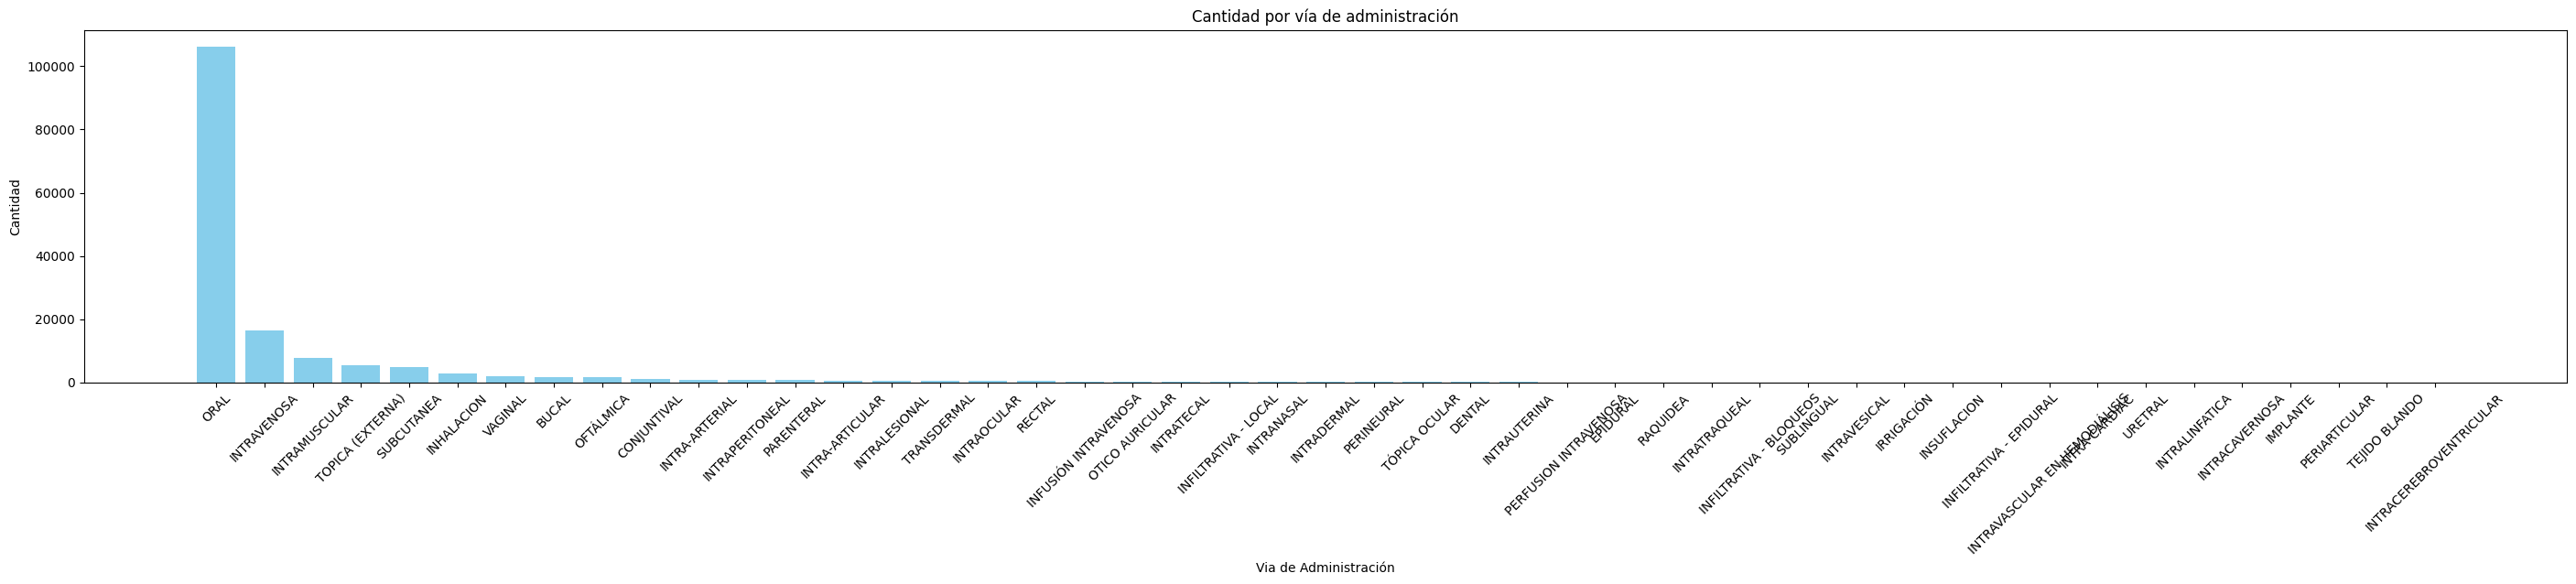

In [13]:
### GRÁFICAS CON matplotlib ###
# 1. Conteo de registros por tipo de administración
conteo_estado = df['viaadministracion'].value_counts()
plt.figure(figsize=(35,5))
plt.bar(conteo_estado.index, conteo_estado.values, color='skyblue')
plt.title('Cantidad por vía de administración')
plt.xlabel('Via de Administración')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

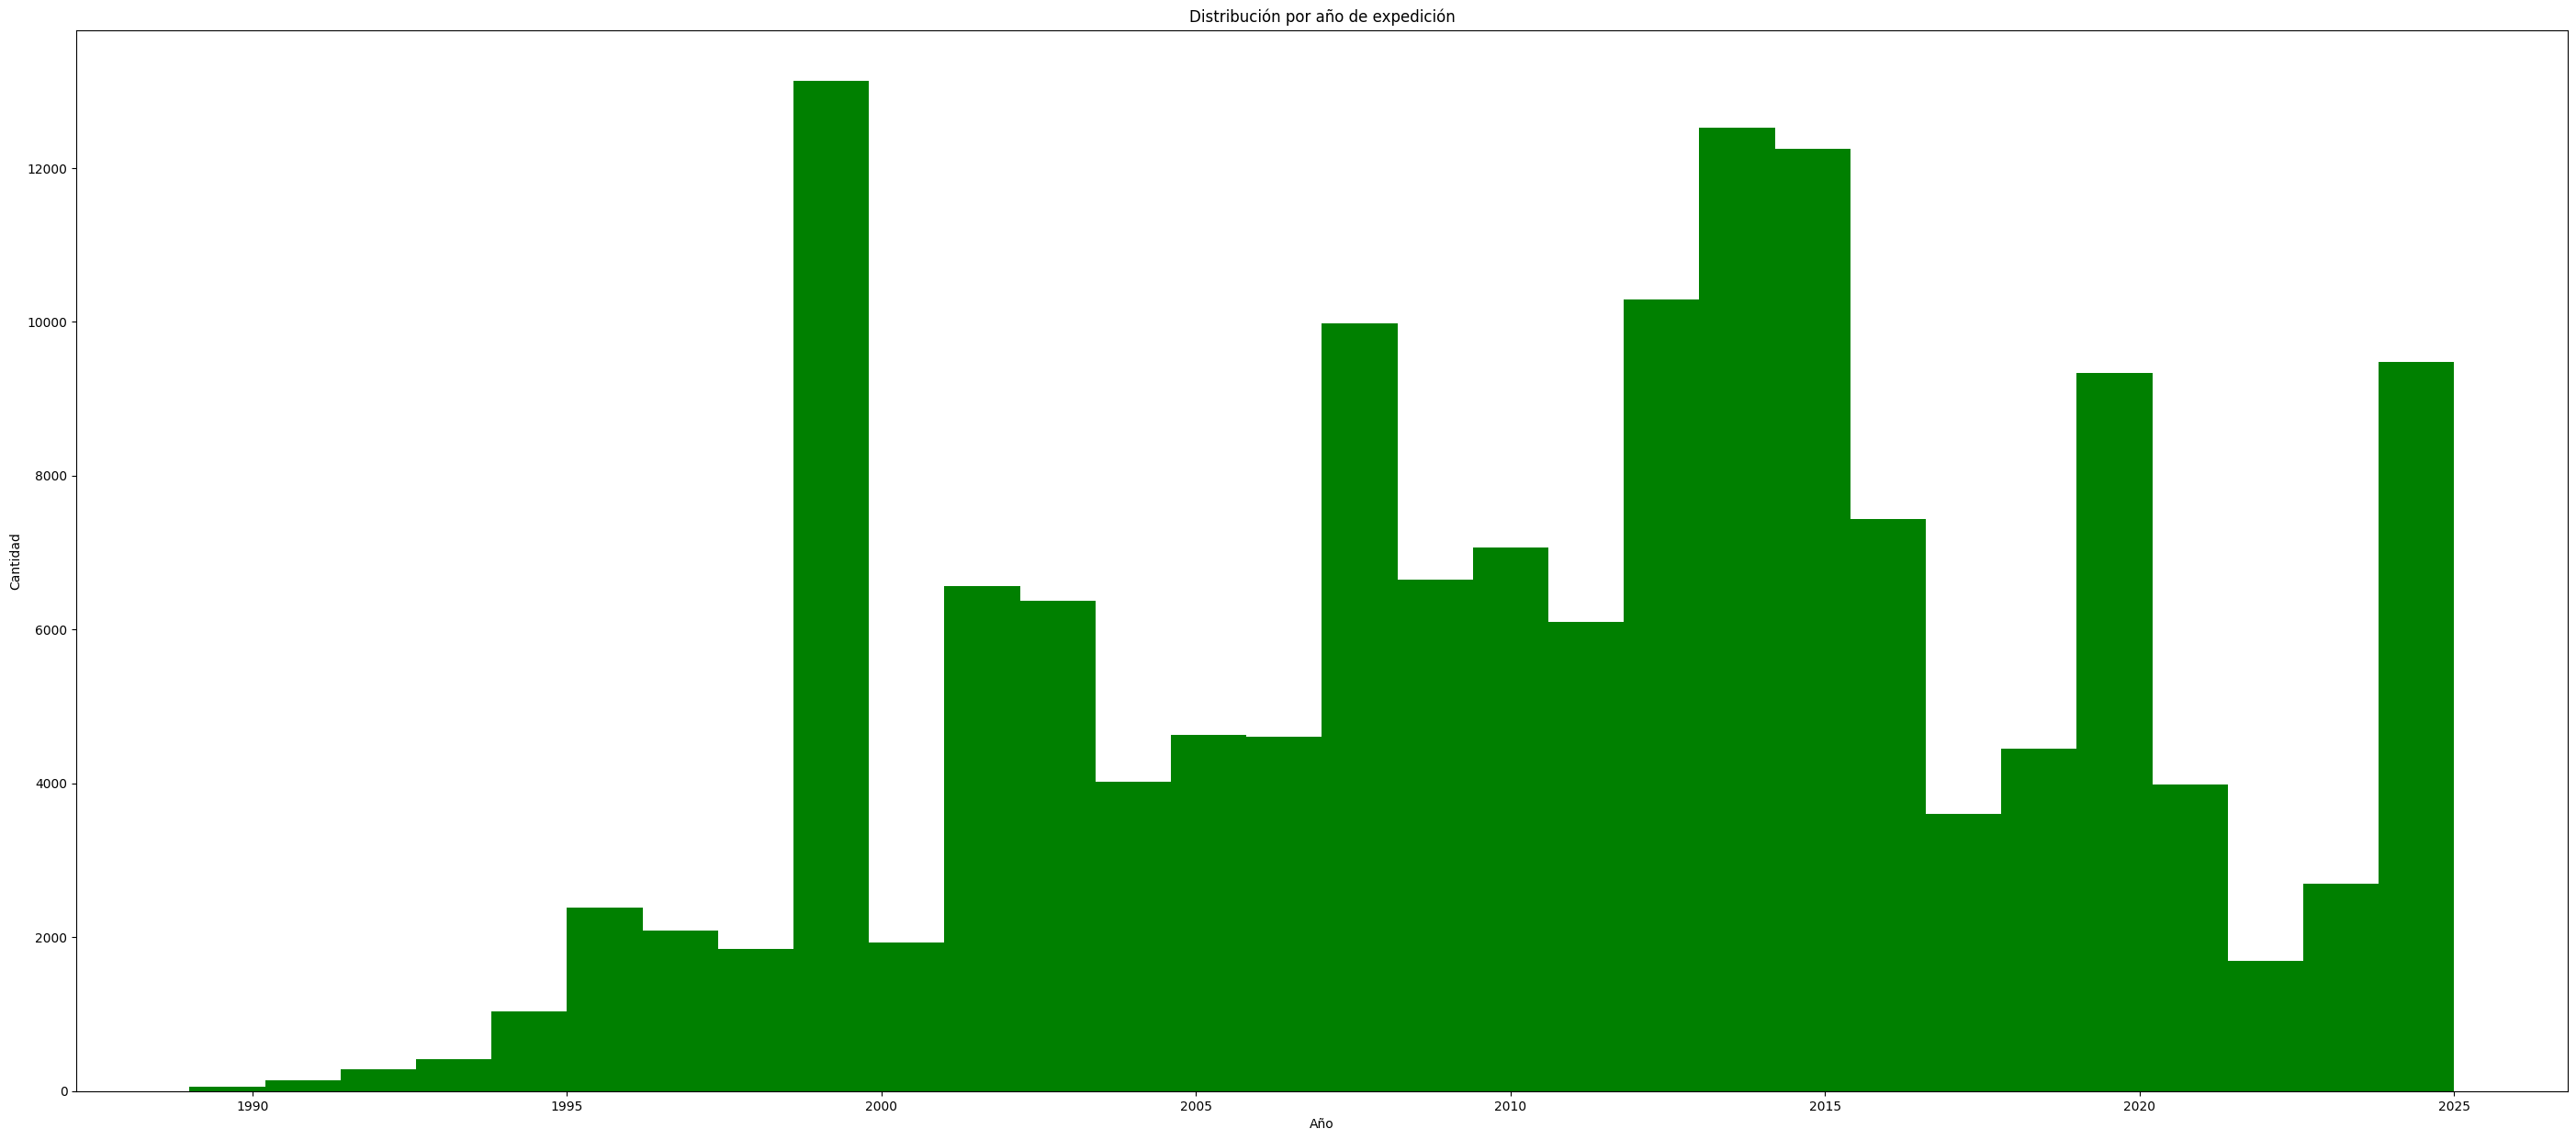

In [14]:
# 2. Histograma de productos por año de expedición
plt.figure(figsize=(35, 15))
df['fechaexpedicion'].dt.year.dropna().astype(int).plot.hist(bins=30, color='green')
plt.title('Distribución por año de expedición')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

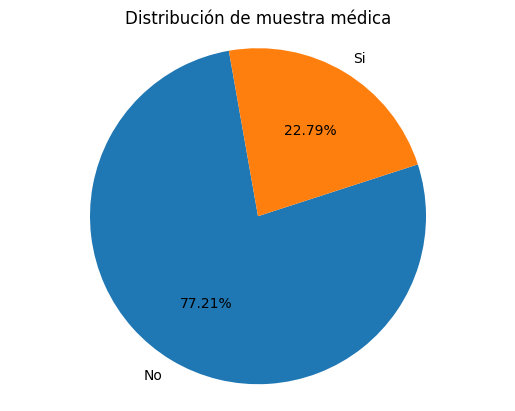

In [15]:
# 3. Productos con muestra médica (Sí/No)
conteo_muestra = df['muestramedica'].value_counts()
plt.pie(conteo_muestra, labels=conteo_muestra.index, autopct='%1.2f%%', startangle=100)
plt.title('Distribución de muestra médica')
plt.axis('equal')
plt.show()

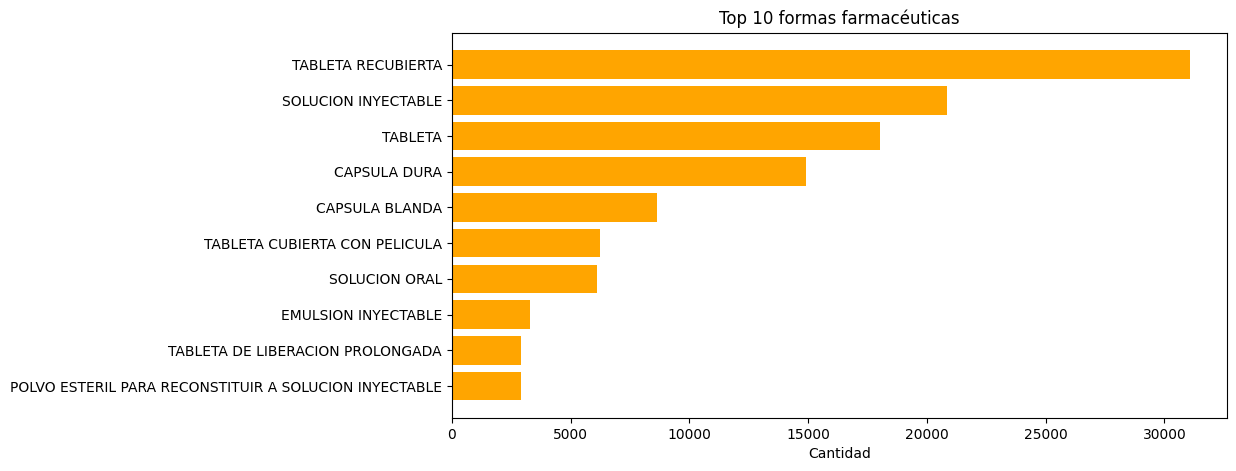

In [16]:
# 4. Top 10 formas farmacéuticas más comunes
formas = df['formafarmaceutica'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.barh(formas.index[::-1], formas.values[::-1], color='orange')
plt.title('Top 10 formas farmacéuticas')
plt.xlabel('Cantidad')
plt.show()

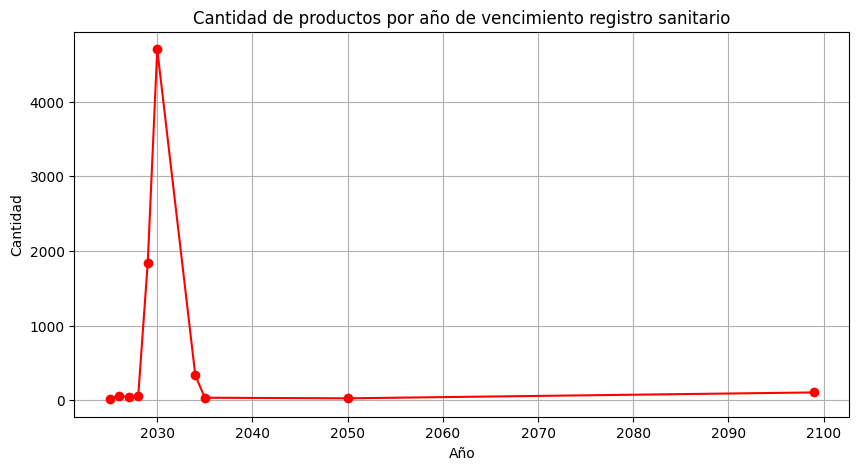

In [17]:
# 5. Cantidad de productos con vencimiento de registro en los próximos años
df['año_vencimiento'] = df['fechavencimiento'].dt.year
vencimientos = df['año_vencimiento'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(vencimientos.index, vencimientos.values, marker='o', color='red')
plt.title('Cantidad de productos por año de vencimiento registro sanitario')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

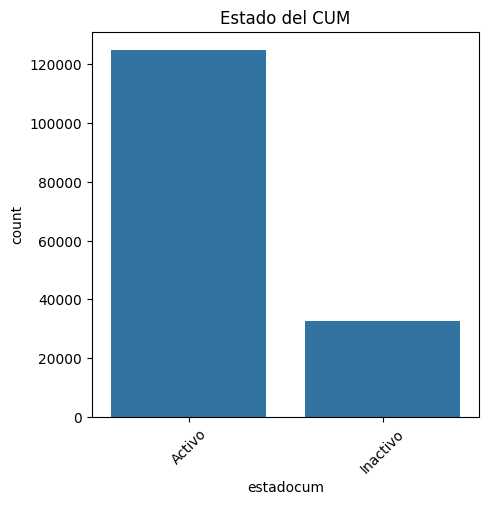

In [18]:
### GRÁFICAS CON seaborn ###

# 1. Número de Productos por Laboratorio - Countplot
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='estadocum', order=df['estadocum'].value_counts().index)
plt.title('Estado del CUM')
plt.xticks(rotation=45)
plt.show()

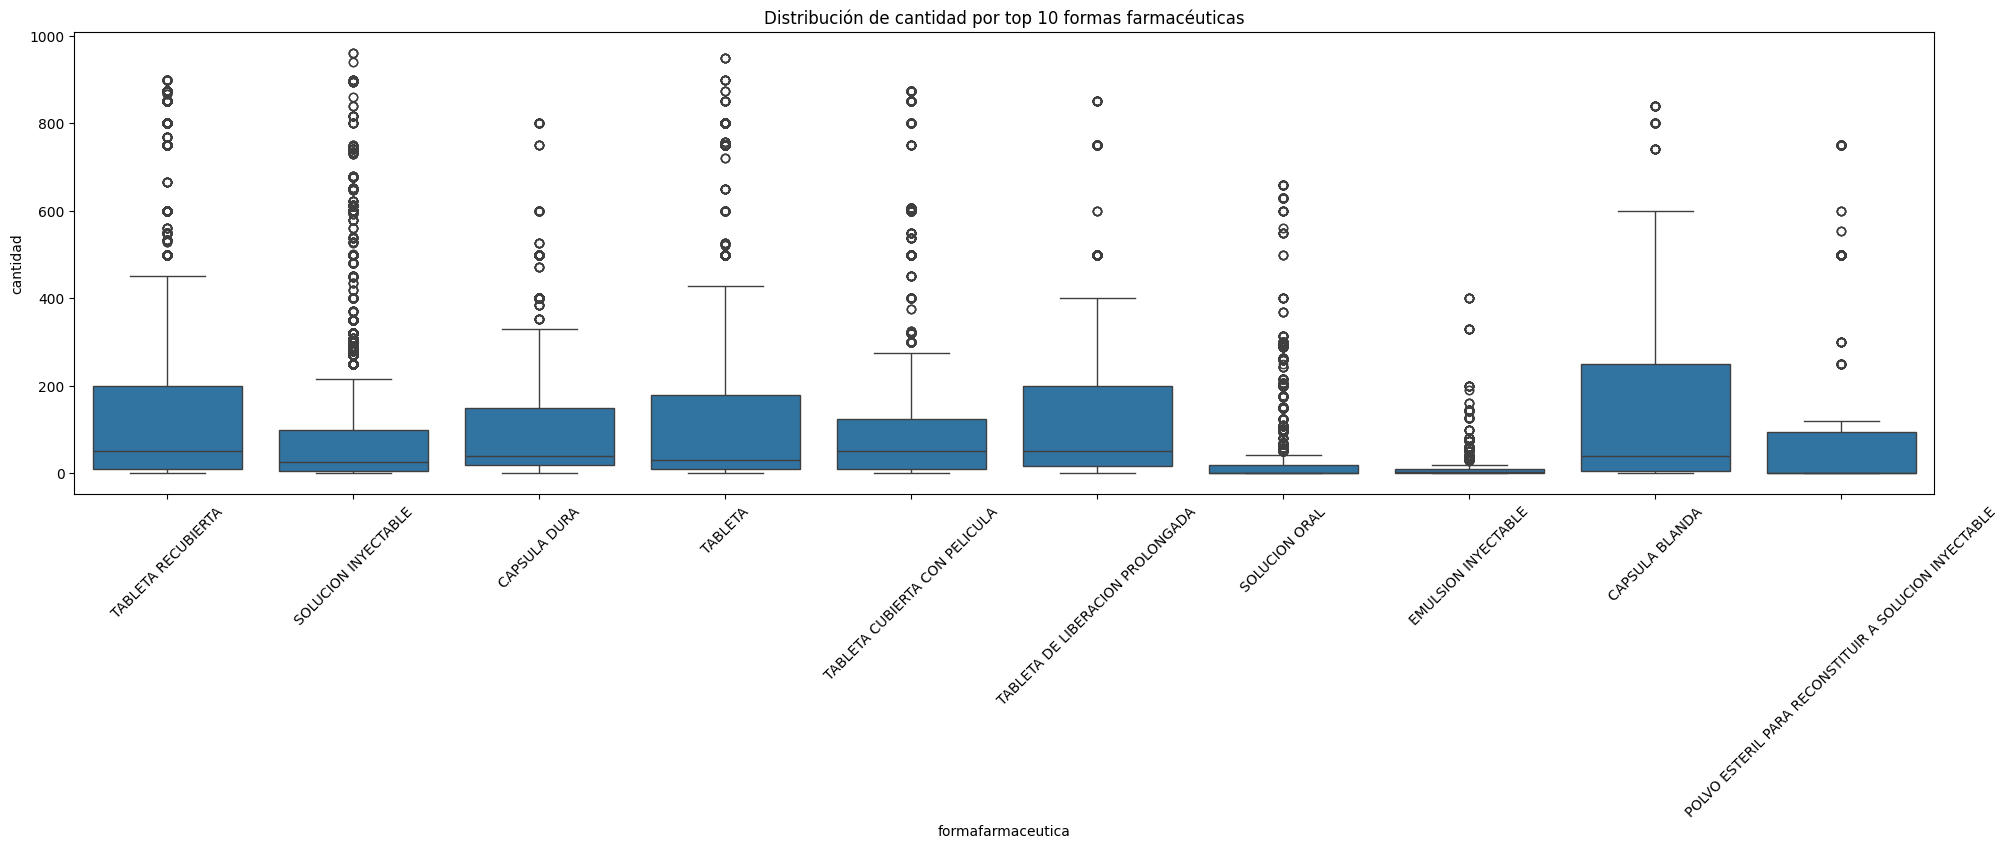

In [19]:
# 2. Distribución de Cantidad por Forma Farmacéutica - Boxplot

top_formas = df['formafarmaceutica'].value_counts().head(10).index
filtro = (df['formafarmaceutica'].isin(top_formas)) & (df['cantidad'] < 1000)

plt.figure(figsize=(24, 6))
sns.boxplot(x='formafarmaceutica', y='cantidad', data=df[filtro])
plt.title('Distribución de cantidad por top 10 formas farmacéuticas')
plt.xticks(rotation=45)
plt.show()

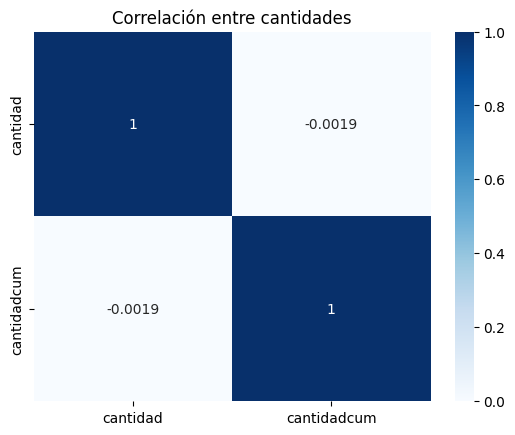

In [20]:
# 3. Heatmap de correlación (solo numéricas)
df_numericas = df[['cantidad', 'cantidadcum']].copy()
sns.heatmap(df_numericas.corr(), annot=True, cmap='Blues')
plt.title('Correlación entre cantidades')
plt.show()

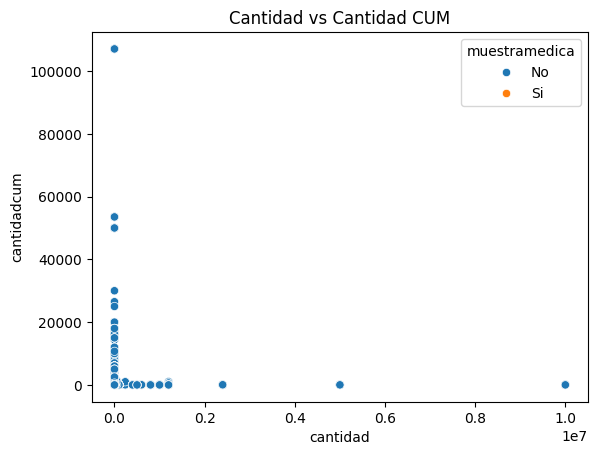

In [21]:
# 4. Gráfico de dispersión de cantidad vs cantidadcum
sns.scatterplot(data=df, x='cantidad', y='cantidadcum', hue='muestramedica')
plt.title('Cantidad vs Cantidad CUM')
plt.show()


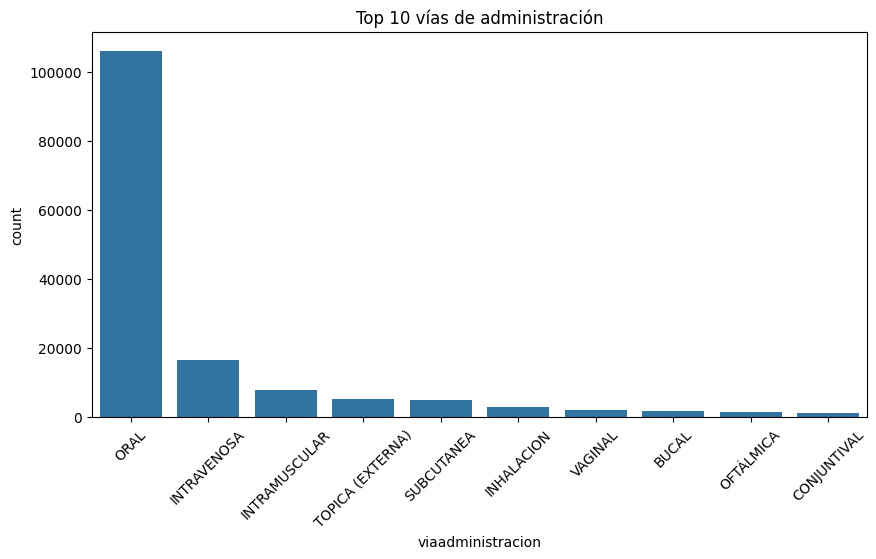

In [22]:
# 5. Countplot de vía de administración (top 10)
plt.figure(figsize=(10, 5))
vias = df['viaadministracion'].value_counts().head(10).index
sns.countplot(data=df[df['viaadministracion'].isin(vias)], x='viaadministracion', order=vias)
plt.title('Top 10 vías de administración')
plt.xticks(rotation=45)
plt.show()